# Heart Prediction

> Enzo Sergiani

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
df = pd.read_csv('../../data/heart.csv', delimiter=',')

df.head()

,id,age,sex,cpt,bps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.drop(columns=['id'])

df_train = df.iloc[::2, :]
df_val = df.iloc[1::2, :]

X_train = df_train.drop(columns=['target']).values
y_train = df_train['target'].values


X_val = df_val.drop(columns=['target']).values
y_val = df_val['target'].values

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [11]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/home/enzo/dev/artificial_intelligence/tp/.env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 10)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/300


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.2918 - loss: 1.1452 - val_accuracy: 0.3642 - val_loss: 1.0997
Epoch 2/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3462 - loss: 1.0353 - val_accuracy: 0.3642 - val_loss: 1.0638
Epoch 3/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3489 - loss: 1.0319 - val_accuracy: 0.3775 - val_loss: 1.0283
Epoch 4/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3694 - loss: 0.9482 - val_accuracy: 0.3841 - val_loss: 0.9944
Epoch 5/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3990 - loss: 0.9308 - val_accuracy: 0.4172 - val_loss: 0.9622
Epoch 6/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4251 - loss: 0.9106 - val_accuracy: 0.4305 - val_loss: 0.9311
Epoch 7/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4296 - loss: 0.8861 - val_accuracy: 0.4503 - val_loss: 0.9018
Epoch 8/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5117 - loss: 0.8195 - val_accuracy: 0.4636 - val_loss: 0.8743
Epoc

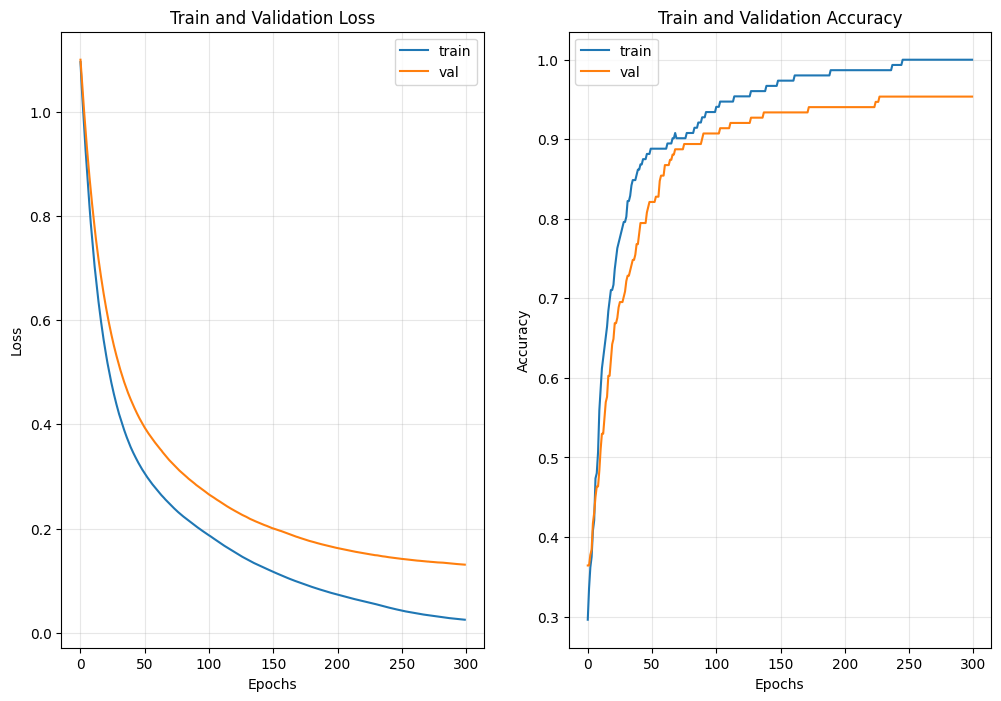

In [13]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
sns.lineplot(x=range(len(history.history['loss'])), y=history.history['loss'], label='train')
sns.lineplot(x=range(len(history.history['val_loss'])), y=history.history['val_loss'], label='val')
plt.grid(alpha=0.3)
plt.title('Train and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
sns.lineplot(x=range(len(history.history['accuracy'])), y=history.history['accuracy'], label='train')
sns.lineplot(x=range(len(history.history['val_accuracy'])), y=history.history['val_accuracy'], label='val')
plt.grid(alpha=0.3)
plt.title('Train and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [14]:
val_loss, val_acc = model.evaluate(X_val, y_val)
print(f'Validation loss: {val_loss*100:.4f}% - Validation accuracy: {val_acc * 100:.2f}%')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9581 - loss: 0.1257 
Validation loss: 13.0844% - Validation accuracy: 95.36%
